In [ ]:
import numpy as np
import pandas as pd

scores = np.random.randint(50,101,size=(50,5))

In [ ]:
#用 pandas 把 numpy.array 給包起來,同時重新命名行列標籤
df = pd.DataFrame(scores,
                  columns=['國文','英文','地理','人文','氣候'],
                  index=[f'stu{i}' for i in range(1,51)])

df

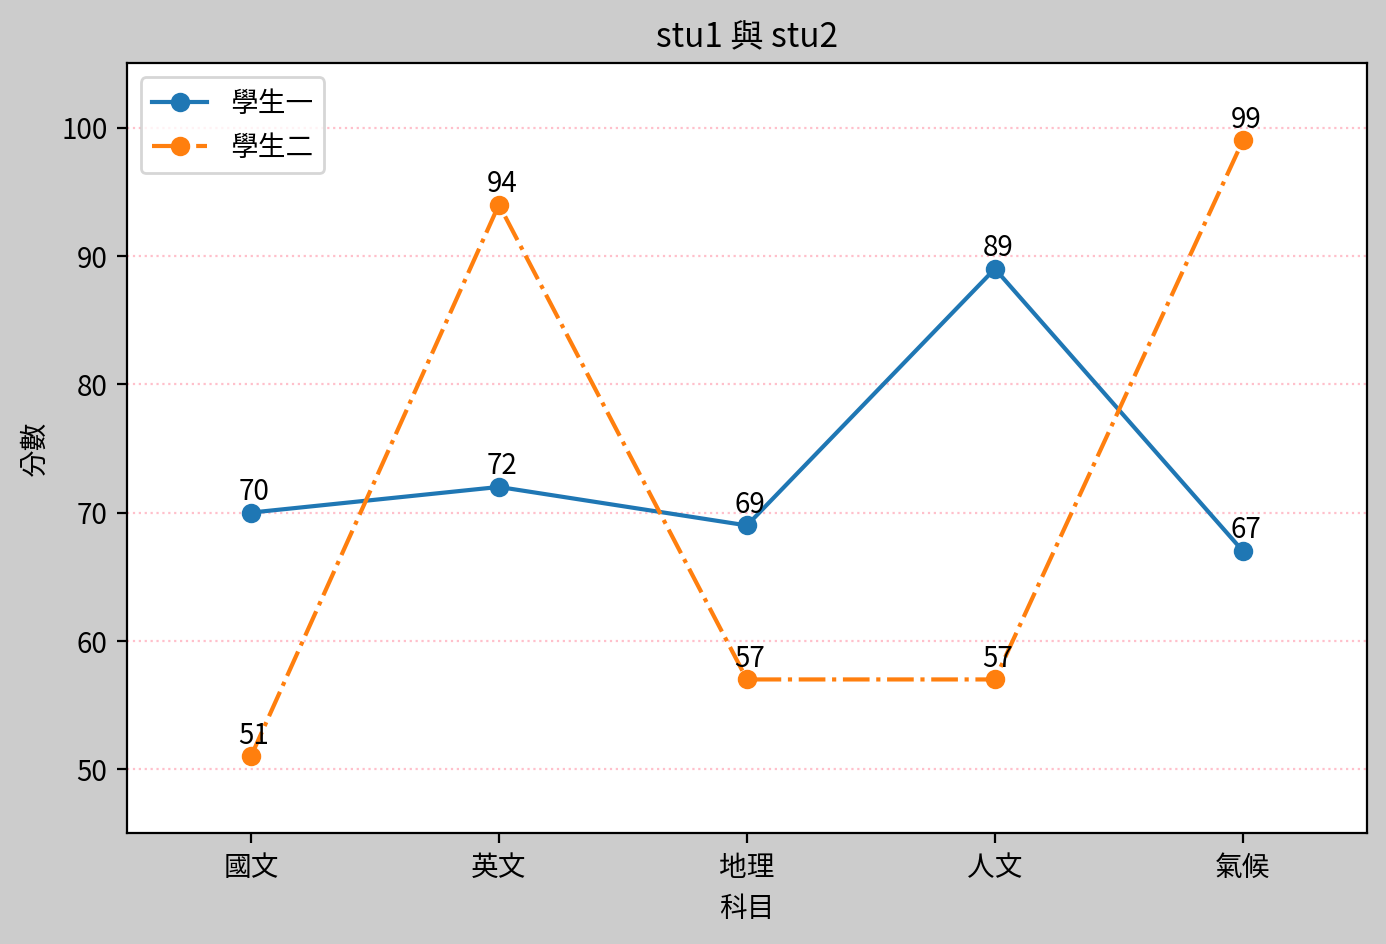

In [17]:
from matplotlib.font_manager import fontManager
import matplotlib as mpl
import matplotlib.pyplot as plt

fontManager.addfont('ChineseFont.ttf')
mpl.rc('font',family='ChineseFont')

name1 = df.loc['stu1'].name
name2 = df.loc['stu2'].name
figure = plt.figure(figsize=[8,5],dpi=200,facecolor='#cccccc')
axes = figure.add_subplot(1,1,1)
axes.plot(df.columns,df.loc['stu1'],marker='o',label='學生一')
axes.plot(df.columns,df.loc['stu2'],marker='o',linestyle='-.',label='學生二')
axes.set_title(f'{name1} 與 {name2}')
axes.set_xlabel('科目')
axes.set_ylabel('分數')
#開啟格線 限制只有Y軸格線 並更改其顏色樣式 alpha是顏色深淺值 0 ~ 1
axes.grid(axis='y',color='pink',alpha=1,linestyle=':')
axes.legend()
xlocations = axes.get_xticks()
for index in range(len(xlocations)) :
    x = xlocations[index]
    student1y = df.loc['stu1'].iloc[index]
    student2y = df.loc['stu2'].iloc[index]
    # print('x座標:',x)
    # print('s1_y座標',student1y)
    # print('s2_y座標',student2y)
    # print('='*10)

    #標上註解 此處 註解=分數
    axes.annotate(str(student1y),(x-0.05,student1y+1))
    if student2y == 98:
        #使用箭頭指出特定節點
        axes.annotate(str(student2y),(x,student2y),xytext=(x+0.3, student2y+3), arrowprops=dict(facecolor='red', shrink=0.05))
    else :
        axes.annotate(str(student2y),(x-0.05,student2y+1))
#設定 x y 上下界 避免註解超出圖表
axes.set_xlim(-0.5,4.5)
axes.set_ylim(45,105)
plt.show()